<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Natural Language Processing  - Neural Network - Sentiment Analysis Amazon, Yelp
</b></font> </br></p>

---

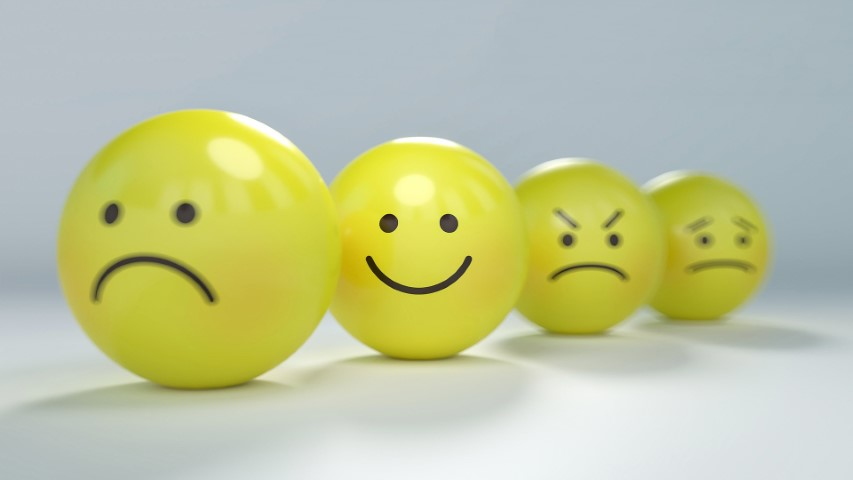

Bild von <a href="https://pixabay.com/de/users/absolutvision-6158753/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2979107">Gino Crescoli</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2979107">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   


„The Social Dilemma“, ein Dokumentarfilm-Drama-Hybrid, untersucht die gefährlichen menschlichen Auswirkungen sozialer Netzwerke. Erstveröffentlichung: Januar 2020 Regie: Jeff Orlowski Produzentin: Larissa Rhodes Musikalische Leitung: Mark A. Crawford Drehbuch: Jeff Orlowski, Vickie Curtis, Davis Coombe.

Dieser Datensatz zeigt Ihnen die Twitter-Antworten mit dem Hashtag TheSocialDilemma, nachdem Sie sich die aufschlussreiche Dokumentation angesehen haben „The Social Dilemma“ wurde am 9. September 2020 auf einer OTT-Plattform (Netflix) veröffentlicht. Der Datensatz wurde mit TwitterAPI extrahiert und besteht aus fast 10.526 Tweets von Twitter-Nutzern auf der ganzen Welt!



[Info](https://www.openml.org/search?type=data&status=active&id=43532)

[DataSet](https://www.openml.org/search?type=data&status=active&id=43532)






Foto von <a href="https://unsplash.com/@nhillier?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Nick Hillier</a> auf <a href="https://unsplash.com/de/fotos/yD5rv8_WzxA?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_id = 43532
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', target_column='Sentiment', data_id=data_id)

In [ ]:
data = df.data.text.copy()
target = df.target.copy()

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">
Tokenizer
</font></p>

Der Datensatz wird tokenisiert (`Tokenizer`). Jedem Wort wird eine eindeutige Nummer zugewiesen – die für das neuronale Netzwerk erforderlich ist, um die Eingabe zu interpretieren.
   
[Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [ ]:
num_words_= 10000              # die maximale Anzahl der zu behaltenden Wörter, basierend auf der Worthäufigkeit
oov_tok_ = "<OOV>"            # wird zu word_index hinzugefügt & und bei fehlenden Wörte bei text_to_sequence-Aufrufen verwendet

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = num_words_, oov_token=oov_tok_)
tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index

In [ ]:
type(word_index), len(word_index)

In [ ]:
word_index

<p><font color='black' size="5">
Text 2 Sequenz
</font></p>

Diese Tokens (Wörter) werden dann in Sequenzen sortiert, um sicherzustellen, dass die Tokens für jedes Wort der richtigen Reihenfolge folgen, wie sie von jedem Satz vorgegeben wird.


[text_to_word_sequence](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/text_to_word_sequence)

In [ ]:
sequences = tokenizer.texts_to_sequences(data)

<p><font color='black' size="5">
Padding
</font></p>

Damit jeder Satz gleich lang ist, werden am Ende eines Satzes Nullen einfügt. Dies ist erforderlich, wenn ein Satz länger als ein anderer ist, da jeder Satz zum Zweck der Analyse durch das RNN gleich lang sein muss.

[pad_sequence](https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100            # optional, maximale Länge der Sequenzen
trunc_type='post'           # Entfernt Worte aus Sequenzen, die größer als maxlen sind, entweder am Anfang oder am Ende der Sequenzen
padding_type='post'         # Auffüllen entweder vor oder nach jeder Sequenz

data_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Konvertierung eines Klassenvektors (Ganzzahlen) in eine binäre Klassenmatrix (Output)

In [ ]:
from keras.utils import to_categorical
num_classes = 3
target.replace(['Negative', 'Neutral', 'Positive'], [0, 1, 2], inplace=True)
target = to_categorical(target, num_classes)

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Zufallszahl setzen
</font></p>

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [ ]:
from sklearn.model_selection import train_test_split
data_train , data_test , target_train , target_test  = train_test_split(data_padded, target, test_size=0.3, random_state=42, stratify=target)

In [ ]:
data_train.shape , data_test.shape , target_train.shape , target_test.shape

<p><font color='black' size="5">
Schrittweise Modellierung eines Neuronalen Netzes
</font></p>

[Core layers](https://keras.io/api/layers/core_layers/)    
[Reshaping layers](https://keras.io/api/layers/reshaping_layers/)   
[Layer activation functions](https://keras.io/api/layers/activations/)   


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, ActivityRegularization
from keras import regularizers

In [ ]:
input_dim_ = num_words_
output_dim_ = 16

model = Sequential()
model.add(Embedding(input_dim_, output_dim_, input_length=max_length))
model.add(Flatten())
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<p><font color='black' size="5">
Einfaches Layer-Diagramm
</font></p>

In [ ]:
model.summary()

<p><font color='black' size="5">
Training
</font></p>


In [ ]:
%%time
epochs_ = 25
batch_size_ = 126
model.fit(data_train, target_train, batch_size=batch_size_, validation_split=0.3, epochs=epochs_)

In [ ]:
print(model.history.params)
print(model.history.history.keys())

<p><font color='black' size="5">
Loss-Entwicklung
</font></p>

In [ ]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=model.history.history['loss'], title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

In [ ]:
# --- Vorverarbeitung: Umwandlung Array mit Wahrscheinlichkeiten in Array mit 0/1
import numpy as np
def probabilities_to_binary(matrix):
    max_indices = tf.keras.backend.argmax(matrix, axis=1)
    binary_matrix = tf.keras.backend.one_hot(max_indices, matrix.shape[1])
    return binary_matrix

In [ ]:
target_train_pred_ = probabilities_to_binary(target_train_pred)
target_test_pred_ = probabilities_to_binary(target_test_pred)

<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred_) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
target_test_pred_ = target_test_pred.round(decimals=0)
acc_test = accuracy_score(target_test, target_test_pred_) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")

<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
max_cols_test_pred = pd.DataFrame(target_test_pred_).idxmax(axis=1)
max_cols_test = pd.DataFrame(target_test).idxmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(max_cols_test, max_cols_test_pred)
display_labels_=['Negative','Neutral', 'Positive']
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels_)
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(max_cols_test, max_cols_test_pred, target_names=display_labels_))

<p><font color='black' size="5">
Einzelne Aussagen - Real vs Predict
</font></p>

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '') for i in text])

In [ ]:
for example in range(0,10):
  print('real: ', max_cols_test[example], 'predict: ', int(np.around(float(max_cols_test_pred[example]),0)), " -- ", decode_review(data_test[example]), sep=" ")

# **5 <font color='orange'>|</font> Deploy**
---